In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff

##############  OFFLINE  ##############
plotly.offline.init_notebook_mode(connected=True)
#to plot offline: ##plotly.offline.iplot##

##############  ONLINE  ##############
#plotly.tools.set_credentials_file(username='arnaurovira23', api_key='7y46ugRJ8Rl6XCkCwBGM')
#to plot online: ##py.iplot##
import plotly.plotly as py


# EXPLORATORY DATA ANALYSIS
### Load datasets

###### train dataset

In [2]:
#Load train dataset
df_train = pd.read_csv('data/train.csv')
df_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [3]:
df_train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [4]:
#Shape of train dataset
num_train = df_train.shape[0]
print(num_train)

15120


In [5]:
features_all = df_train.drop(columns='Id').columns.tolist()
print(features_all)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [6]:
feat_soils = [feat for feat in features_all if 'Soil' in feat]
feat_wild = [feat for feat in features_all if 'Wilderness' in feat]
feat_num = [feat for feat in features_all if ('Wilderness' not in feat) & ('Soil' not in feat) & ('Cover' not in feat)]


In [7]:
df_train.isnull().sum().sum()
print(f"How many NaN values are in df_train dataset? {df_train.isnull().sum().sum()}")

How many NaN values are in df_train dataset? 0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

Since the soil and wilderness type features are dummy categorical variables and the cover type are labels, we use uint8

In [9]:
df_train[feat_wild]=df_train[feat_wild].astype('uint8')
df_train[feat_soils]=df_train[feat_soils].astype('uint8')
df_train['Cover_Type']=df_train['Cover_Type'].astype('uint8')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null uint8
Wilderness_Area2                      15120 non-null uint8
Wilderness_Area3                      15120 non-null uint8
Wilderness_Area4                      15120 non-null uint8
Soil_T

###### test dataset

In [11]:
#Load test dataset
df_test = pd.read_csv('data/test.csv')
df_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0            196             214            156  ...            0   
1            201             216            152  ...            0   
2            206             208            137  ...            0   
3            208             201            125  ...            0   
4            210             195            115  ...            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

In [12]:
df_test.describe()

Id      Elevation         Aspect          Slope  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean   298066.500000    2964.977407     155.629558      14.039635   
std    163359.093603     273.157030     111.962120       7.450155   
min     15121.000000    1859.000000       0.000000       0.000000   
25%    156593.750000    2818.000000      58.000000       9.000000   
50%    298066.500000    2999.000000     127.000000      13.000000   
75%    439539.250000    3164.000000     260.000000      18.000000   
max    581012.000000    3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     565892.000000                   565892.000000   
mean                         270.556622                       46.294408   
std                          212.500153                       58.209469   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          228.000000                       29.000000   
75%                          390.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    565892.000000  565892.000000   565892.000000   
mean                       2367.143116     212.131133      223.435026   
std                        1561.482002      26.661063       19.668053   
min                           0.000000       0.000000        0.000000   
25%                        1116.000000     198.000000      213.000000   
50%                        2018.000000     218.000000      226.000000   
75%                        3349.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  ...    Soil_Type31    Soil_Type32    Soil_Type33  \
count  565892.000000  ...  565892.000000  565892.000000  565892.000000   
mean      142.726951  ...       0.044768       0.091588       0.078704   
std        38.030094  ...       0.206795       0.288444       0.269277   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%       119.000000  ...       0.000000       0.000000       0.000000   
50%       143.000000  ...       0.000000       0.000000       0.000000   
75%       168.000000  ...       0.000000       0.000000       0.000000   
max       254.000000  ...       1.000000       1.000000       1.000000   

         Soil_Type34    Soil_Type35    Soil_Type36    Soil_Type37  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean        0.002808       0.003161       0.000193       0.000467   
std         0.052916       0.056137       0.013877       0.021594   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type38    Soil_Type39    Soil_Type40  
count  565892.000000  565892.000000  565892.000000  
mean        0.026233       0.023236       0.014651  
std         0.159827       0.150652       0.120152  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 55 columns]

In [13]:
df_test.isnull().sum().sum()
print(f"How many NaN values are in df_train dataset? {df_test.isnull().sum().sum()}")

How many NaN values are in df_train dataset? 0


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
Id                                    565892 non-null int64
Elevation                             565892 non-null int64
Aspect                                565892 non-null int64
Slope                                 565892 non-null int64
Horizontal_Distance_To_Hydrology      565892 non-null int64
Vertical_Distance_To_Hydrology        565892 non-null int64
Horizontal_Distance_To_Roadways       565892 non-null int64
Hillshade_9am                         565892 non-null int64
Hillshade_Noon                        565892 non-null int64
Hillshade_3pm                         565892 non-null int64
Horizontal_Distance_To_Fire_Points    565892 non-null int64
Wilderness_Area1                      565892 non-null int64
Wilderness_Area2                      565892 non-null int64
Wilderness_Area3                      565892 non-null int64
Wilderness_Area4                      565892 non-

In [15]:
#Shape of test dataset
num_test = df_test.shape[0]
print(num_test)

565892


In [16]:
df_test[feat_wild]=df_test[feat_wild].astype('uint8')
df_test[feat_soils]=df_test[feat_soils].astype('uint8')


#### Analyze class balance

In [17]:
#count number of Cover_Type == TARGET on train dataset
df_train['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64


Each target has 2160 observations

### Visualize histogram of feature hued by cover type

In [18]:
#plot the Elevetion frequency with seaborn for each Target

# fig = plt.figure(figsize=(10,8))
# title = fig.suptitle("Elevation distribution", fontsize=14)
# fig.subplots_adjust(top=0.93, wspace=0.3)
# sns.set_style("ticks")

# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel("Elevation")
# ax.set_ylabel("Frequency") 

# g = sns.FacetGrid(data=df_train[['Cover_Type','Elevation']], hue='Cover_Type')

# g.map(sns.distplot, 'Elevation', kde=True, bins=15, ax=ax)

# ax.legend(title='Cover_type')
# plt.close(2)

In [19]:
#plot histogram of Elevation for each target with plot.ly

# trace = []
# for i in range(1,len(df_train['Cover_Type'].unique())+1):
#     trace.append(go.Histogram(x=df_train[df_train['Cover_Type']==i]['Elevation'],opacity=0.75))

# layout = go.Layout(barmode='overlay')

# fig = go.Figure(data=trace, layout=layout)

# plotly.offline.iplot(fig)

In [20]:
feature = 'Slope'
trace = []
group_labels = []

for i in np.sort(df_train['Cover_Type'].unique())[::-1]:
    trace.append(df_train[df_train['Cover_Type']==i][feature])
    group_labels.append(f"Cover type {int(i)}")

fig = ff.create_distplot(trace, group_labels, bin_size=10, show_rug = True)
fig['layout'].update(title=f"Hist and Dist of {feature}")

# Plot!
plotly.offline.iplot(fig, filename='Distplot with Multiple Datasets')

### Visualize histogram of all features in a given cover type

In [21]:
trace = []
name = []

features = df_train.columns.tolist()[1:11]
#number of desired cover type or -1 for all cover types
cover_type = -1
for i, feat in enumerate(features):
    if cover_type > 0:
        trace.append(go.Histogram(x = df_train.loc[df_train['Cover_Type']==cover_type,feat],nbinsx=30))
    else:
        trace.append(go.Histogram(x = df_train[feat],nbinsx=30))        
        
    name.append(feat)

    
fig = tools.make_subplots(rows=2, cols=5,subplot_titles = name, vertical_spacing=.2, horizontal_spacing=.05 )

for k in fig['layout'].annotations:
    k['font'].update(size=10)

if cover_type > 0:
    fig['layout'].update(showlegend=False, title=f'Histograms of all features for Cover_Type{cover_type}')
else:
    fig['layout'].update(showlegend=False, title=f'Histograms of all features for all cover types')
    



m = 0
#row
for x in range(1,3):
    #column
    for n in range(1,6):
        fig.append_trace(trace[m], x, n)
        m = m + 1


plotly.offline.iplot(fig, filename='custom binning')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]



In [22]:
covertypes = np.sort(df_train['Cover_Type'].unique())

def compare_dist(ax, feature, i=0):
    for ct in covertypes:
        sns.kdeplot(df_train[df_train['Cover_Type']==ct][feature], label = f"Cover Type {ct}", ax=ax)

def numeric_tile(plot_func):
    fig, axs = plt.subplots(2, 5, figsize=(45, 25))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features)):
        plot_func(ax, col, i)
        ax.set_title(col)
    plt.tight_layout()

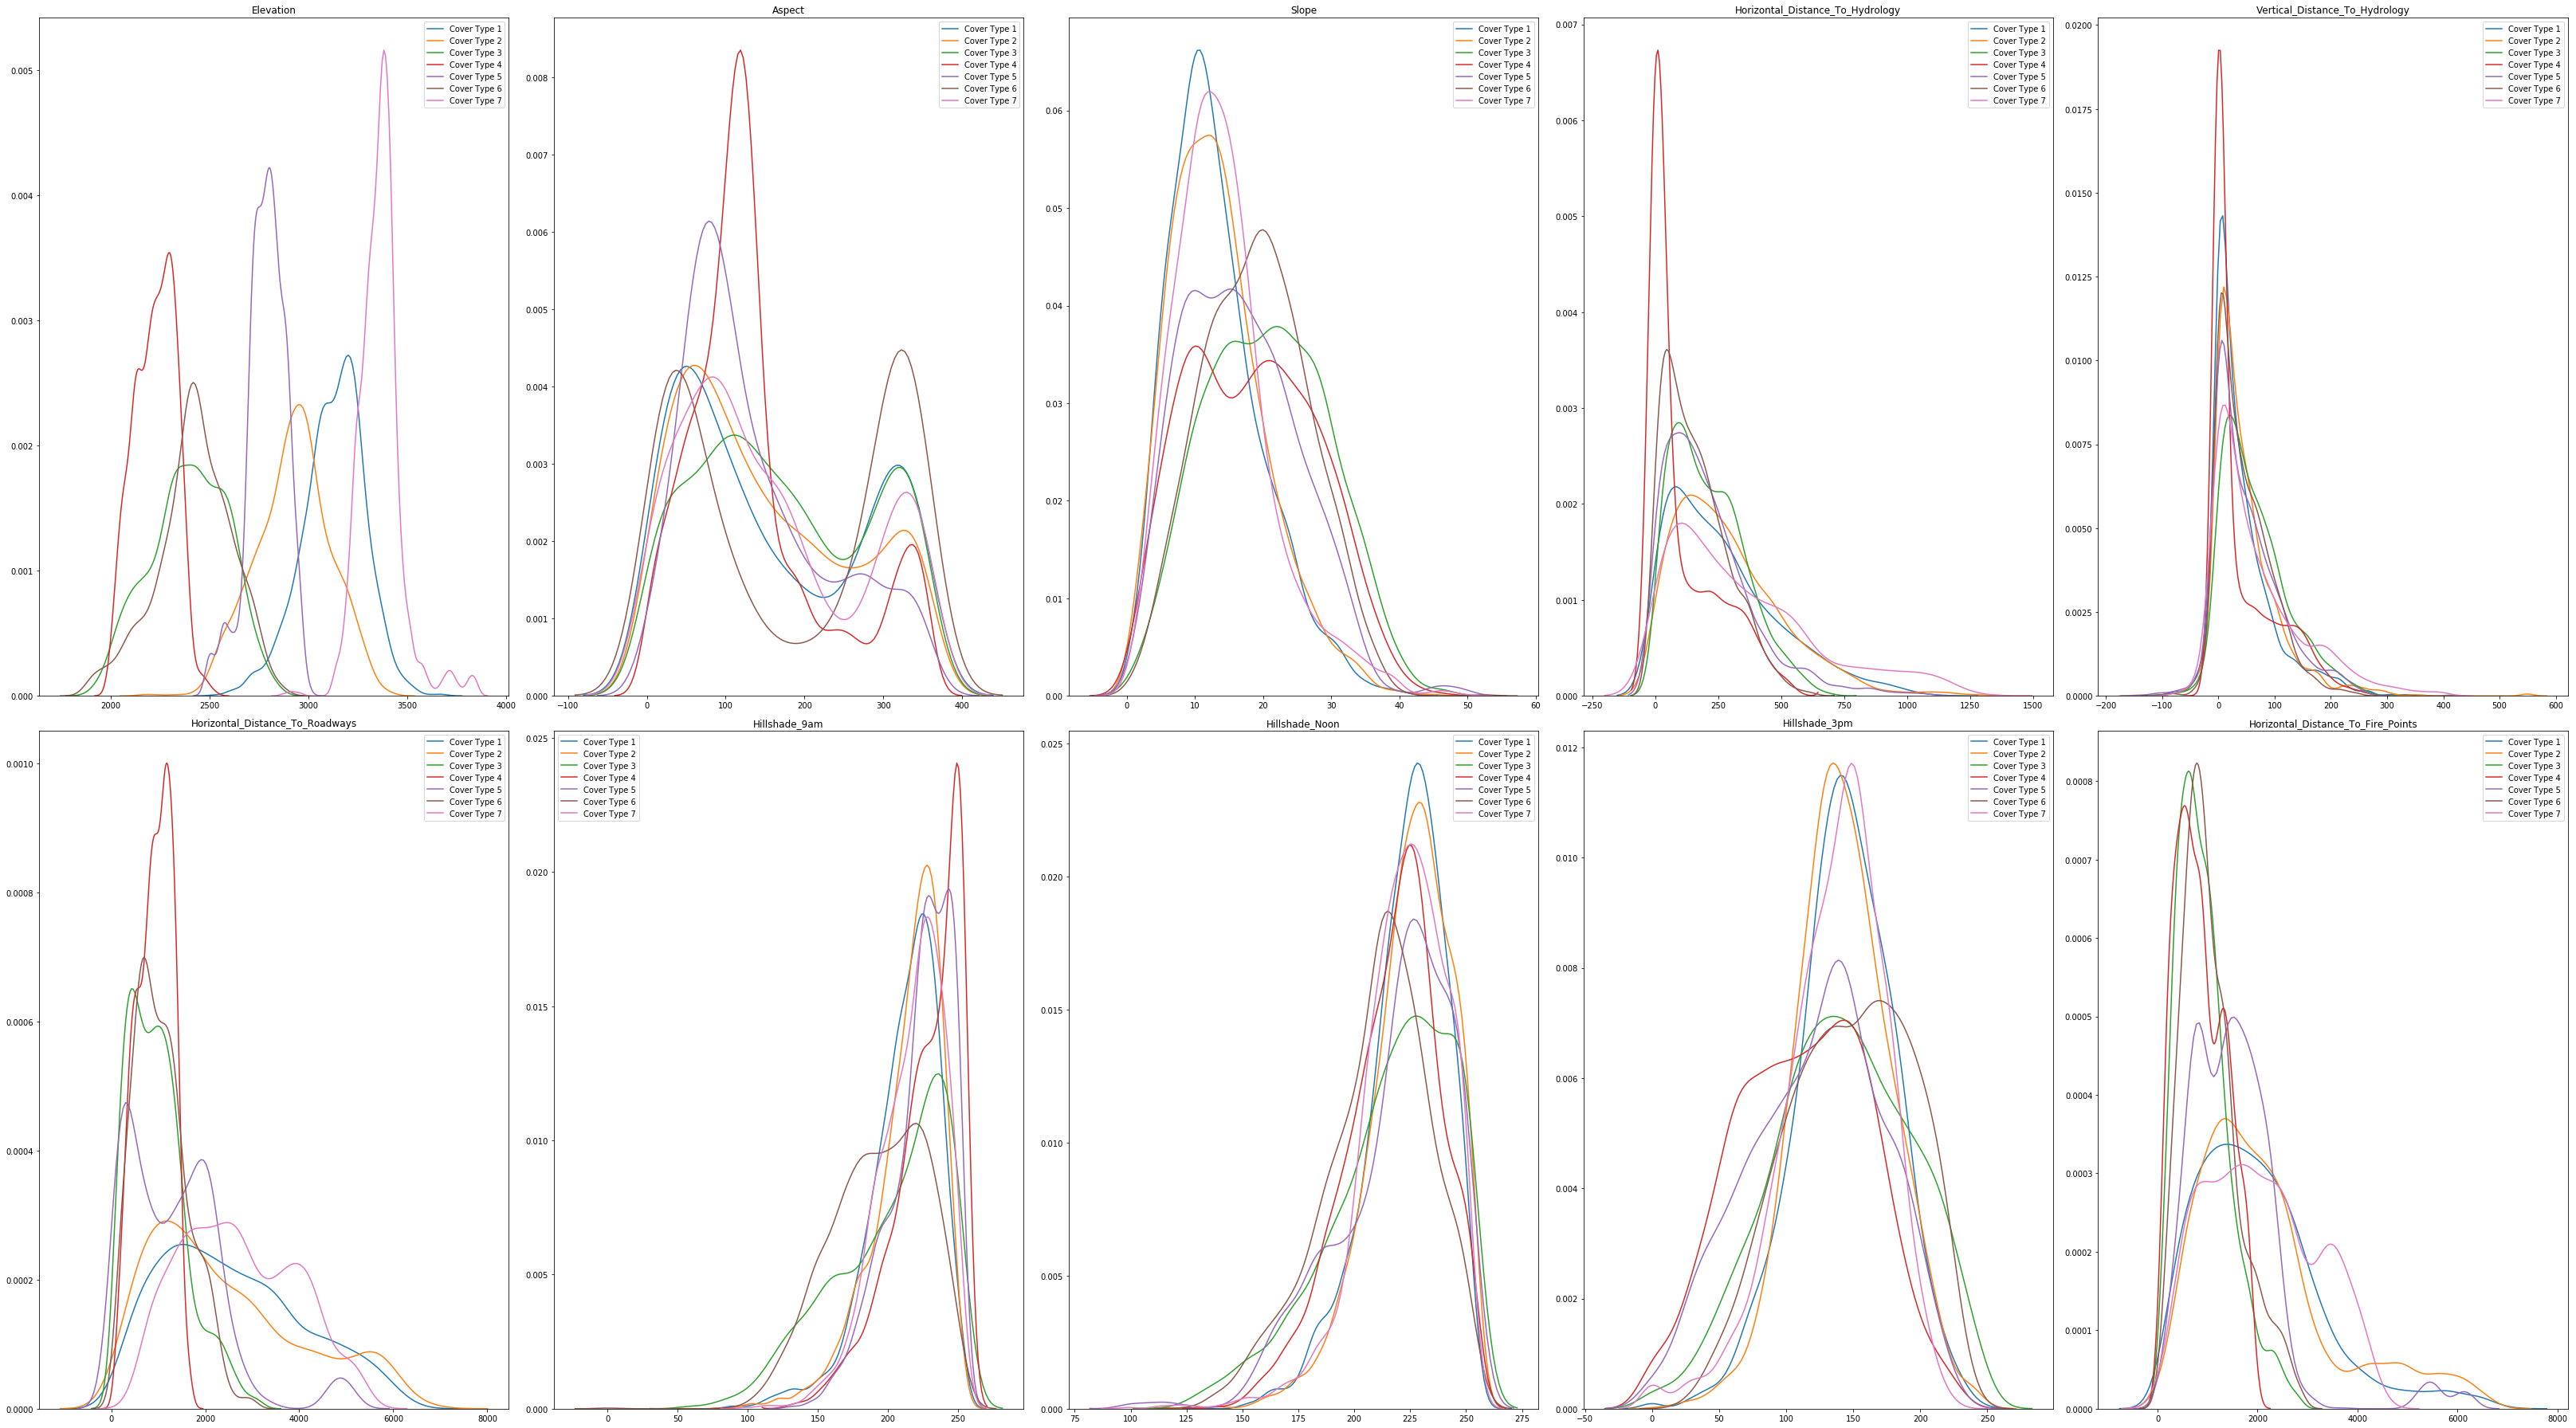

In [23]:
numeric_tile(compare_dist)

### Compare train and test features

In [24]:
#histograms of train vs test

def compare_dist(ax, feature, i=0):
    sns.kdeplot(df_train[feature], label="train", ax=ax)
    sns.kdeplot(df_test[feature], label="test", ax=ax)


def numeric_tile(plot_func):
    fig, axs = plt.subplots(2, 5, figsize=(24, 10))
    axs = axs.flatten()
    
    for i, (ax, col) in enumerate(zip(axs, features)):
        plot_func(ax, col, i)
        ax.set_title(col)
    plt.tight_layout()

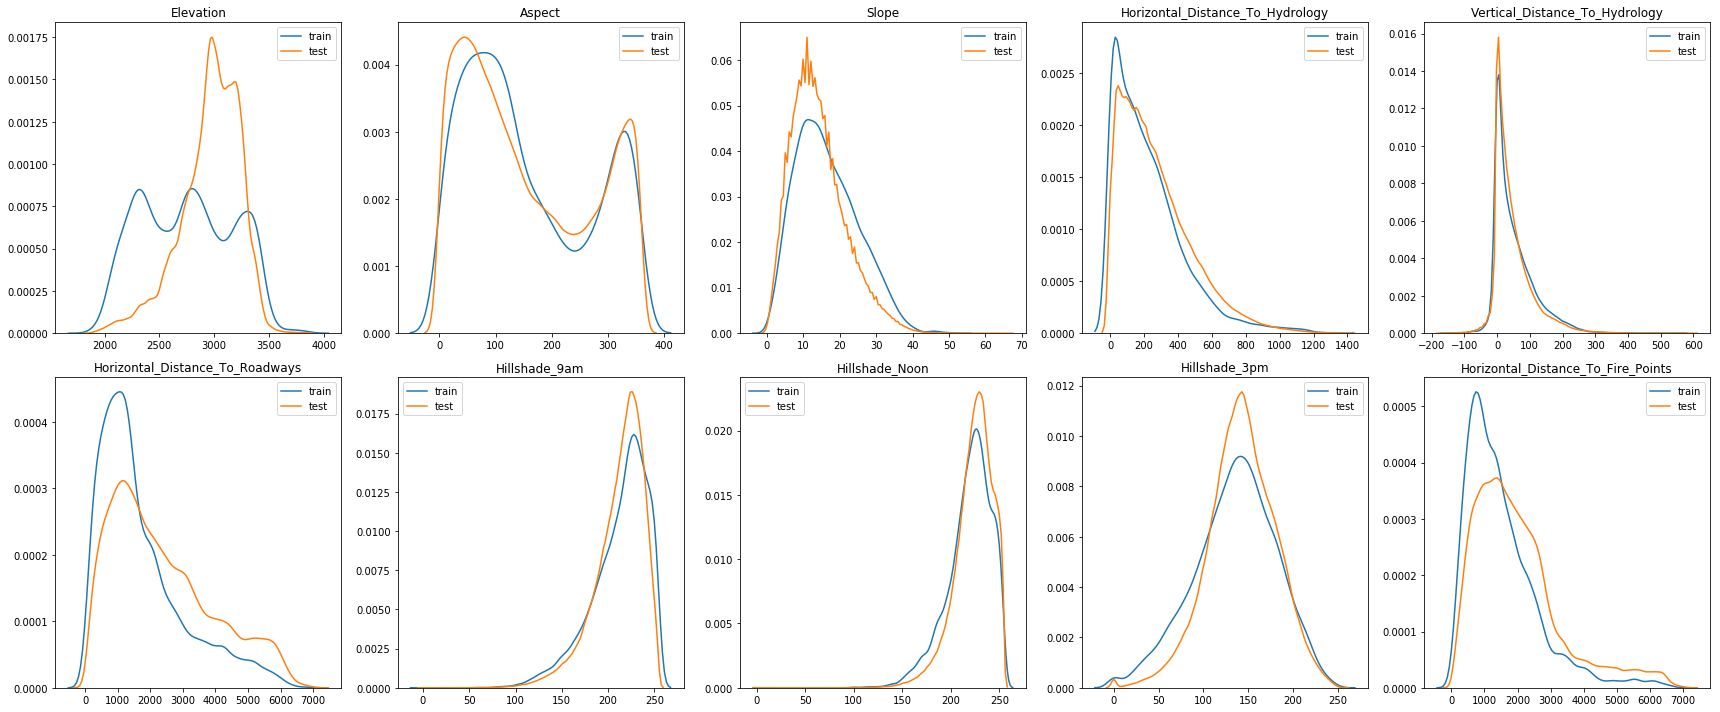

In [25]:
numeric_tile(compare_dist)

Elevation is quite different between train and test set

## Analysis of outliers

In [26]:
feature = 'Horizontal_Distance_To_Roadways'
trace = []
group_labels = []

for i in covertypes:
    trace.append(go.Box(y = df_train[df_train['Cover_Type']==i][feature], name = f'Cover type {int(i)}'))

layout = go.Layout(showlegend=False, xaxis = dict(tickfont=dict(size=12)), title = f"Box plot of {feature}")

fig = go.Figure(data=trace, layout=layout)

plotly.offline.iplot(fig, filename="Box Plot Styling Outliers")

### Number of outliers based on IQR

#### Outliers for all cover types

In [27]:
Q1 = df_train[features].quantile(0.25)
Q3 = df_train[features].quantile(0.75)
IQR = Q3 - Q1

out_tm = ((df_train[features] < (Q1 - 1.5 * IQR)) | (df_train[features] > (Q3 + 1.5 * IQR)))
outliers_iqr = pd.DataFrame(data={'outliers_IQR_count':out_tm.sum(),\
                              'outliers_IQR_%':100*out_tm.sum()/df_train.shape[0]})

outliers_iqr.sort_values(by='outliers_IQR_count',ascending=False)

outliers_IQR_count  outliers_IQR_%
Horizontal_Distance_To_Roadways                    830        5.489418
Horizontal_Distance_To_Fire_Points                 645        4.265873
Vertical_Distance_To_Hydrology                     586        3.875661
Horizontal_Distance_To_Hydrology                   512        3.386243
Hillshade_9am                                      408        2.698413
Hillshade_Noon                                     393        2.599206
Hillshade_3pm                                      124        0.820106
Slope                                               57        0.376984
Elevation                                            0        0.000000
Aspect                                               0        0.000000

Horizontal and Vertical distances features are the ones with more outliers based on IQR

#### Outliers broken down by cover type

In [28]:
indexes = [f'Cover_Type{x}' for x in covertypes]

dic_ = {}

#definir en numero de features a mostrar
feature=['Elevation']

for feat in feature:
       
    out = []
    out_pct = []
    for ct in covertypes:
    
        df_ct = df_train.loc[df_train['Cover_Type']==ct]
        
    
        Q1 = df_ct[feat].quantile(0.25)
        Q3 = df_ct[feat].quantile(0.75)
        IQR = Q3 - Q1
    
        out_tm = ((df_ct[feat] < (Q1 - 1.5 * IQR)) | (df_ct[feat] > (Q3 + 1.5 * IQR)))
        out.append(out_tm.sum())
        out_pct.append(100*out_tm.sum()/df_ct.shape[0])
    dic_[f'{feat}_IQR_outliers'] = out
    dic_[f'{feat}_%_IQR_outliers'] = out_pct  


df_outliers_iqr = pd.DataFrame(dic_,index=indexes)
df_outliers_iqr

Elevation_IQR_outliers  Elevation_%_IQR_outliers
Cover_Type1                      43                  1.990741
Cover_Type2                       9                  0.416667
Cover_Type3                       0                  0.000000
Cover_Type4                       0                  0.000000
Cover_Type5                      45                  2.083333
Cover_Type6                      41                  1.898148
Cover_Type7                      88                  4.074074

##### IQR outliers all features grouped by Cover_Type 

In [29]:
indexes = [f'Cover_Type{x}' for x in covertypes]


dic_ = {}

#definir en numero de features a mostrar
feat_num = [feat for feat in features_all if ('Wilderness' not in feat) & ('Soil' not in feat) & ('Cover' not in feat)]

for feat in feat_num:
       
    out = []
    out_pct = []
    for ct in covertypes:
    
        df_ct = df_train.loc[df_train['Cover_Type']==ct]
        
    
        Q1 = df_ct[feat].quantile(0.25)
        Q3 = df_ct[feat].quantile(0.75)
        IQR = Q3 - Q1
    
        out_tm = ((df_ct[feat] < (Q1 - 1.5 * IQR)) | (df_ct[feat] > (Q3 + 1.5 * IQR)))
        out.append(out_tm.sum())
        #out_pct.append(100*out_tm.sum()/df_ct.shape[0])
    dic_[f'{feat}_IQR_outliers'] = out
    #dic_[f'{feat}_%_outliers'] = out_pct  


df_outliers_iqr_total = pd.DataFrame(dic_,index=indexes)
df_outliers_iqr_total

Elevation_IQR_outliers  Aspect_IQR_outliers  Slope_IQR_outliers  \
Cover_Type1                      43                    0                  44   
Cover_Type2                       9                    0                  49   
Cover_Type3                       0                    0                   1   
Cover_Type4                       0                  263                   0   
Cover_Type5                      45                    0                  16   
Cover_Type6                      41                    0                   2   
Cover_Type7                      88                    0                  71   

             Horizontal_Distance_To_Hydrology_IQR_outliers  \
Cover_Type1                                             45   
Cover_Type2                                             40   
Cover_Type3                                              9   
Cover_Type4                                             32   
Cover_Type5                                             83   
Cover_Type6                                             19   
Cover_Type7                                             41   

             Vertical_Distance_To_Hydrology_IQR_outliers  \
Cover_Type1                                          137   
Cover_Type2                                          120   
Cover_Type3                                           44   
Cover_Type4                                           84   
Cover_Type5                                           72   
Cover_Type6                                           35   
Cover_Type7                                           82   

             Horizontal_Distance_To_Roadways_IQR_outliers  \
Cover_Type1                                             0   
Cover_Type2                                             1   
Cover_Type3                                            40   
Cover_Type4                                             0   
Cover_Type5                                            76   
Cover_Type6                                            18   
Cover_Type7                                             0   

             Hillshade_9am_IQR_outliers  Hillshade_Noon_IQR_outliers  \
Cover_Type1                          66                           51   
Cover_Type2                          67                           42   
Cover_Type3                           6                           31   
Cover_Type4                          41                           32   
Cover_Type5                          42                           24   
Cover_Type6                           2                           18   
Cover_Type7                          29                           49   

             Hillshade_3pm_IQR_outliers  \
Cover_Type1                          25   
Cover_Type2                          25   
Cover_Type3                           0   
Cover_Type4                           0   
Cover_Type5                           0   
Cover_Type6                           0   
Cover_Type7                          48   

             Horizontal_Distance_To_Fire_Points_IQR_outliers  
Cover_Type1                                               77  
Cover_Type2                                              164  
Cover_Type3                                               66  
Cover_Type4                                                0  
Cover_Type5                                               69  
Cover_Type6                                               63  
Cover_Type7                                                0

In [30]:
#trace = []
#group_labels = []

#feat_num = [feat for feat in df_outliers_total.columns]

#for i in np.sort(df_outliers_total.index.to_list()):
    #trace.append(go.Bar(x=feat_num, y = df_outliers_total.loc[df_outliers_total.index==i,feat_num].get_values()[0], name = str(i)))
    
#data = trace
#layout = go.Layout(xaxis = dict(tickfont=dict(size=7)))
#fig = go.Figure(data=data, layout=layout)

#plotly.offline.iplot(fig)

###### Total outliers by Cover_Type

In [31]:
nums = [(lambda cover : df_outliers_iqr_total.loc[cover].sum()) (cover) for cover in df_outliers_iqr_total.index.tolist()]
df_outliers_ct_iqr = pd.DataFrame(data = {'Outliers_IQR_Total':nums,'%_IQR': ([(lambda i: 100*i/np.sum(nums))(i) for i in nums])},\
                              index = df_outliers_iqr_total.index.to_list())
df_outliers_ct_iqr.sort_values(by='Outliers_IQR_Total', ascending=False)

Outliers_IQR_Total      %_IQR
Cover_Type2                 517  19.240789
Cover_Type1                 488  18.161518
Cover_Type4                 452  16.821734
Cover_Type5                 427  15.891329
Cover_Type7                 408  15.184220
Cover_Type6                 198   7.368813
Cover_Type3                 197   7.331597

In [32]:
trace = []
group_labels = []

trace = [go.Bar(x = df_outliers_ct_iqr.index.to_list(), y = df_outliers_ct_iqr.iloc[:,0].to_list(),
               marker=dict(color='rgba(50, 171, 96, 0.6)',line=dict(color='rgba(50, 171, 96, 1.0)',width=1)))]
    

layout = go.Layout(barmode='group',xaxis = dict(tickfont=dict(size=10)), title = 'Total Outliers IQR per Cover_Type')
fig = go.Figure(data=trace, layout=layout)

plotly.offline.iplot(fig)

### Number of outliers based on SD

In [34]:
cutoff = 4

ct_mean, ct_std = np.mean(df_train[features]), np.std(df_train[features])
cut_off = ct_std * cutoff
lower, upper = ct_mean - cut_off, ct_mean + cut_off
out_tm = ((df_train[features] < lower) | (df_train[features] > upper))
outliers_sd = pd.DataFrame(data = {'outliers_SD_count':out_tm.sum(),\
                                  'outliers_SD_%':100*out_tm.sum()/df_train.shape[0]})
outliers_sd.sort_values(by='outliers_SD_count',ascending=False)

outliers_SD_count  outliers_SD_%
Horizontal_Distance_To_Fire_Points                114       0.753968
Horizontal_Distance_To_Hydrology                   85       0.562169
Vertical_Distance_To_Hydrology                     55       0.363757
Hillshade_Noon                                     28       0.185185
Hillshade_9am                                      22       0.145503
Slope                                               1       0.006614
Elevation                                           0       0.000000
Aspect                                              0       0.000000
Horizontal_Distance_To_Roadways                     0       0.000000
Hillshade_3pm                                       0       0.000000

In [35]:
dic_ = {}

#definir en numero de features a mostrar
feature=['Elevation']
#definir cutoff:
cutoff = 4

for feat in feature:
    
    out = []
    out_pct = []
    
    for ct in covertypes:
    
        df_ct = df_train.loc[df_train['Cover_Type']==ct]
        
        ct_mean, ct_std = np.mean(df_ct[feat]), np.std(df_ct[feat])
        cut_off = ct_std * cutoff
        lower, upper = ct_mean - cut_off, ct_mean + cut_off
    
        out_tm = ((df_ct[feat] < lower) | (df_ct[feat] > upper))
        out.append(out_tm.sum())
        out_pct.append(100*out_tm.sum()/df_ct.shape[0])
    dic_[f'{feat}_SD_outliers'] = out
    dic_[f'{feat}_%_SD_outliers'] = out_pct  

df_outliers_sd = pd.DataFrame(dic_,index=indexes)
df_outliers_sd

Elevation_SD_outliers  Elevation_%_SD_outliers
Cover_Type1                      0                 0.000000
Cover_Type2                      1                 0.046296
Cover_Type3                      0                 0.000000
Cover_Type4                      0                 0.000000
Cover_Type5                      0                 0.000000
Cover_Type6                      0                 0.000000
Cover_Type7                     27                 1.250000

In [36]:
indexes = [f'Cover_Type{x}' for x in covertypes]


dic_ = {}

#definir en numero de features a mostrar
feat_num = [feat for feat in features_all if ('Wilderness' not in feat) & ('Soil' not in feat) & ('Cover' not in feat)]

for feat in feat_num:
       
    out = []
    out_pct = []
    for ct in covertypes:
    
        df_ct = df_train.loc[df_train['Cover_Type']==ct]
        
    
        ct_mean, ct_std = np.mean(df_ct[feat]), np.std(df_ct[feat])
        cut_off = ct_std * cutoff
        lower, upper = ct_mean - cut_off, ct_mean + cut_off
    
        out_tm = ((df_ct[feat] < lower) | (df_ct[feat] > upper))
        out.append(out_tm.sum())
        #out_pct.append(100*out_tm.sum()/df_ct.shape[0])
    dic_[f'{feat}_SD_outliers'] = out
    #dic_[f'{feat}_%_outliers'] = out_pct  


df_outliers_total_sd = pd.DataFrame(dic_,index=indexes)
df_outliers_total_sd

Elevation_SD_outliers  Aspect_SD_outliers  Slope_SD_outliers  \
Cover_Type1                      0                   0                  1   
Cover_Type2                      1                   0                  2   
Cover_Type3                      0                   0                  0   
Cover_Type4                      0                   0                  0   
Cover_Type5                      0                   0                  0   
Cover_Type6                      0                   0                  1   
Cover_Type7                     27                   0                  6   

             Horizontal_Distance_To_Hydrology_SD_outliers  \
Cover_Type1                                             0   
Cover_Type2                                             8   
Cover_Type3                                             0   
Cover_Type4                                             0   
Cover_Type5                                            13   
Cover_Type6                                             0   
Cover_Type7                                             0   

             Vertical_Distance_To_Hydrology_SD_outliers  \
Cover_Type1                                           9   
Cover_Type2                                          15   
Cover_Type3                                           0   
Cover_Type4                                           0   
Cover_Type5                                           0   
Cover_Type6                                           4   
Cover_Type7                                           6   

             Horizontal_Distance_To_Roadways_SD_outliers  \
Cover_Type1                                            0   
Cover_Type2                                            0   
Cover_Type3                                            0   
Cover_Type4                                            0   
Cover_Type5                                            0   
Cover_Type6                                            0   
Cover_Type7                                            0   

             Hillshade_9am_SD_outliers  Hillshade_Noon_SD_outliers  \
Cover_Type1                          7                           2   
Cover_Type2                          8                           4   
Cover_Type3                          0                           0   
Cover_Type4                          1                           0   
Cover_Type5                          2                          10   
Cover_Type6                          1                           0   
Cover_Type7                          6                           9   

             Hillshade_3pm_SD_outliers  \
Cover_Type1                          0   
Cover_Type2                          0   
Cover_Type3                          0   
Cover_Type4                          0   
Cover_Type5                          0   
Cover_Type6                          0   
Cover_Type7                          0   

             Horizontal_Distance_To_Fire_Points_SD_outliers  
Cover_Type1                                               1  
Cover_Type2                                               0  
Cover_Type3                                               0  
Cover_Type4                                               0  
Cover_Type5                                              49  
Cover_Type6                                               0  
Cover_Type7                                               0

In [37]:
nums = [(lambda cover : df_outliers_total_sd.loc[cover].sum()) (cover) for cover in df_outliers_total_sd.index.to_list()]
df_outliers_ct_sd = pd.DataFrame(data = {'Outliers_Total_SD':nums,'%_SD': ([(lambda i: 100*i/np.sum(nums))(i) for i in nums])},\
                              index = df_outliers_total_sd.index.to_list())
df_outliers_ct_sd 

Outliers_Total_SD       %_SD
Cover_Type1                 20  10.362694
Cover_Type2                 38  19.689119
Cover_Type3                  0   0.000000
Cover_Type4                  1   0.518135
Cover_Type5                 74  38.341969
Cover_Type6                  6   3.108808
Cover_Type7                 54  27.979275

In [38]:
trace = []
group_labels = []

trace = [go.Bar(x = df_outliers_ct_sd.index.to_list(), y = df_outliers_ct_sd.iloc[:,0].to_list(),
               marker=dict(color='rgba(50, 171, 96, 0.6)',line=dict(color='rgba(100, 171, 86, 5.0)',width=1)))]
    

layout = go.Layout(barmode='group',xaxis = dict(tickfont=dict(size=10)), title = 'Total Outliers SD per Cover_Type')
fig = go.Figure(data=trace, layout=layout)

plotly.offline.iplot(fig)

### Compare between IQR and SD outliers

In [40]:
diff_otl = df_outliers_ct_sd.merge(df_outliers_ct_iqr, left_index = True, right_index=True)
diff_otl['diff_%'] = diff_otl['%_IQR'] - diff_otl['%_SD']
diff_otl.sort_values('diff_%',ascending=False)

Outliers_Total_SD       %_SD  Outliers_IQR_Total      %_IQR  \
Cover_Type4                  1   0.518135                 452  16.821734   
Cover_Type1                 20  10.362694                 488  18.161518   
Cover_Type3                  0   0.000000                 197   7.331597   
Cover_Type6                  6   3.108808                 198   7.368813   
Cover_Type2                 38  19.689119                 517  19.240789   
Cover_Type7                 54  27.979275                 408  15.184220   
Cover_Type5                 74  38.341969                 427  15.891329   

                diff_%  
Cover_Type4  16.303600  
Cover_Type1   7.798824  
Cover_Type3   7.331597  
Cover_Type6   4.260005  
Cover_Type2  -0.448330  
Cover_Type7 -12.795054  
Cover_Type5 -22.450640

## Cleaning of soils type

In [41]:
#dataframe subset to select the Soils without targets
df_soils = df_train.groupby(['Cover_Type'])[feat_soils].sum()
df_soils.head()

Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
Cover_Type                                                               
1                  0.0         0.0         0.0         5.0         0.0   
2                  0.0         3.0        12.0        20.0         0.0   
3                121.0       283.0       133.0       462.0        55.0   
4                139.0        94.0       799.0       133.0        39.0   
5                  0.0        61.0         0.0       129.0         0.0   

            Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  ...  \
Cover_Type                                                               ...   
1                  0.0         0.0         0.0         1.0          9.0  ...   
2                  7.0         0.0         1.0         9.0         81.0  ...   
3                248.0         0.0         0.0         0.0        717.0  ...   
4                244.0         0.0         0.0         0.0        170.0  ...   
5                  0.0         0.0         0.0         0.0         64.0  ...   

            Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
Cover_Type                                                                    
1                 114.0        230.0        184.0          0.0          3.0   
2                  97.0        255.0        184.0         12.0          1.0   
3                   0.0          5.0          0.0          0.0          0.0   
4                   0.0          0.0          0.0          0.0          0.0   
5                  87.0        100.0        115.0          4.0          0.0   

            Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
Cover_Type                                                                   
1                   0.0          0.0         80.0         79.0         49.0  
2                   2.0          0.0          7.0          3.0          3.0  
3                   0.0          0.0          0.0          0.0          0.0  
4                   0.0          0.0          0.0          0.0          0.0  
5                   0.0          0.0          0.0          0.0          0.0  

[5 rows x 40 columns]

In [42]:
trace = []
name = []

for i in range(len(df_soils.index.values)):
    trace.append(go.Bar(x = feat_soils,y=df_soils.iloc[i]))
    name.append(f'Cover Type {i+1}')

   
fig = tools.make_subplots(rows=7, cols=1,subplot_titles = name, vertical_spacing = 0.1 )


for k in fig['layout'].annotations:
    k['font'].update(size=10)
    

fig['layout'].update(showlegend=False, height=1500, width=1000, title='Target Counts per Soil_Type')



m = 0
#row
for x in range(1,8):
    #column
    for n in range(1,2):
        fig.append_trace(trace[m], x, n)
        m = m + 1


plotly.offline.iplot(fig) 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]
[ (7,1) x7,y7 ]



In [43]:
print(f"Is every training datapoint assigned only one soil type? {(df_train[feat_soils].sum(axis = 1) == 1).all()}")
print(f"Is every test datapoint assigned only one soil type? {(df_test[feat_soils].sum(axis = 1) == 1).all()}")

Is every training datapoint assigned only one soil type? True
Is every test datapoint assigned only one soil type? True


In [44]:
soils_not_used_train = []
for feat, i in (df_train[feat_soils].sum() ==0).iteritems():
    if i:
        soils_not_used_train.append(feat)
        print(f"{feat} is not used in train but has {df_test[feat].sum()} instances on test")

Soil_Type7 is not used in train but has 105 instances on test
Soil_Type15 is not used in train but has 3 instances on test


#### Compare occurences of soil between train and test

In [45]:
soils_types = pd.DataFrame(data={'soils_count_train':df_train[feat_soils].sum(),\
                                 'soils_count_test':df_test[feat_soils].sum(),\
                                 'soils_percentage_train':100*df_train[feat_soils].sum()/num_train,\
                                 'soils_percentage_test':100*df_test[feat_soils].sum()/num_test})
soils_types

soils_count_train  soils_count_test  soils_percentage_train  \
Soil_Type1                 355              2676                2.347884   
Soil_Type2                 623              6902                4.120370   
Soil_Type3                 962              3861                6.362434   
Soil_Type4                 843             11553                5.575397   
Soil_Type5                 165              1432                1.091270   
Soil_Type6                 650              5925                4.298942   
Soil_Type7                   0               105                0.000000   
Soil_Type8                   1               178                0.006614   
Soil_Type9                  10              1137                0.066138   
Soil_Type10               2142             30492               14.166667   
Soil_Type11                406             12004                2.685185   
Soil_Type12                227             29744                1.501323   
Soil_Type13                476             16955                3.148148   
Soil_Type14                169               430                1.117725   
Soil_Type15                  0                 3                0.000000   
Soil_Type16                114              2731                0.753968   
Soil_Type17                612              2810                4.047619   
Soil_Type18                 60              1839                0.396825   
Soil_Type19                 46              3975                0.304233   
Soil_Type20                139              9120                0.919312   
Soil_Type21                 16               822                0.105820   
Soil_Type22                345             33028                2.281746   
Soil_Type23                757             56995                5.006614   
Soil_Type24                257             21021                1.699735   
Soil_Type25                  1               473                0.006614   
Soil_Type26                 54              2535                0.357143   
Soil_Type27                 15              1071                0.099206   
Soil_Type28                  9               937                0.059524   
Soil_Type29               1291            113956                8.538360   
Soil_Type30                725             29445                4.794974   
Soil_Type31                332             25334                2.195767   
Soil_Type32                690             51829                4.563492   
Soil_Type33                616             44538                4.074074   
Soil_Type34                 22              1589                0.145503   
Soil_Type35                102              1789                0.674603   
Soil_Type36                 10               109                0.066138   
Soil_Type37                 34               264                0.224868   
Soil_Type38                728             14845                4.814815   
Soil_Type39                657             13149                4.345238   
Soil_Type40                459              8291                3.035714   

             soils_percentage_test  
Soil_Type1                0.472882  
Soil_Type2                1.219667  
Soil_Type3                0.682286  
Soil_Type4                2.041556  
Soil_Type5                0.253052  
Soil_Type6                1.047020  
Soil_Type7                0.018555  
Soil_Type8                0.031455  
Soil_Type9                0.200922  
Soil_Type10               5.388307  
Soil_Type11               2.121253  
Soil_Type12               5.256127  
Soil_Type13               2.996155  
Soil_Type14               0.075986  
Soil_Type15               0.000530  
Soil_Type16               0.482601  
Soil_Type17               0.496561  
Soil_Type18               0.324974  
Soil_Type19               0.702431  
Soil_Type20               1.611615  
Soil_Type21               0.145257  
Soil_Type22               5.836449  
Soil_Type23              10.071710  
Soil_Typ

In [46]:
trace0 = go.Scatter(x=soils_types.index,y=soils_types['soils_percentage_train'], name = 'train')
trace1 = go.Scatter(x=soils_types.index,y=soils_types['soils_percentage_test'], name = 'test')
fig = go.Figure(data=[trace0,trace1])
fig['layout'].update(title='Percentage of soil type')
plotly.offline.iplot(fig, filename='basic-line')


## Cleaning data for wilderness areas

In [47]:
#dataframe subset to select the wilderness areas without targets
feat_wild = [feat for feat in features_all if 'Wilderness' in feat]
df_wilderness = df_train.groupby(['Cover_Type'])[feat_wild].sum()
df_wilderness.head()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  \
Cover_Type                                                         
1                     1062.0             181.0             917.0   
2                     1134.0              66.0             940.0   
3                        0.0               0.0             863.0   
4                        0.0               0.0               0.0   
5                      856.0               0.0            1304.0   

            Wilderness_Area4  
Cover_Type                    
1                        0.0  
2                       20.0  
3                     1297.0  
4                     2160.0  
5                        0.0

In [48]:
trace = []
name = []

for i in range(len(df_wilderness.index.values)):
    trace.append(go.Bar(x = df_wilderness.columns,y=df_wilderness.iloc[i]))
    name.append(f"Cover Type {i+1}")

   
fig = tools.make_subplots(rows=7, cols=1,subplot_titles = name, vertical_spacing = .1)


for k in fig['layout'].annotations:
    k['font'].update(size=10)
    

fig['layout'].update(showlegend=False, height=1200, width=600, title='Target Counts per Wilderness')


m = 0
#row
for x in range(1,8):
    #column
    for n in range(1,2):
        fig.append_trace(trace[m], x, n)
        m = m + 1


plotly.offline.iplot(fig) 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]
[ (7,1) x7,y7 ]



In [49]:
print(f"Is every training datapoint assigned only one wilderness type? {(df_train[feat_wild].sum(axis = 1) == 1).all()}")
print(f"Is every test datapoint assigned only one wilderness type? {(df_test[feat_wild].sum(axis = 1) == 1).all()}")

Is every training datapoint assigned only one wilderness type? True
Is every test datapoint assigned only one wilderness type? True


In [50]:
wild_not_used_train = []
for feat, i in (df_train[feat_wild].sum() ==0).iteritems():
    if i:
        wild_not_used_train.append(feat)
        print(f"{feat} is not used in train but has {df_test[feat].sum()} instances on test")



#### Compare occurences of soil between train and test

In [51]:
wild_types = pd.DataFrame(data={'wilderness_count_train':df_train[feat_wild].sum(),\
                                 'wilderness_count_test':df_test[feat_wild].sum(),\
                                 'wilderness_percentage_train':100*df_train[feat_wild].sum()/num_train,\
                                 'wilderness_percentage_test':100*df_test[feat_wild].sum()/num_test})
wild_types

wilderness_count_train  wilderness_count_test  \
Wilderness_Area1                    3597                 257199   
Wilderness_Area2                     499                  29385   
Wilderness_Area3                    6349                 247015   
Wilderness_Area4                    4675                  32293   

                  wilderness_percentage_train  wilderness_percentage_test  
Wilderness_Area1                    23.789683                   45.450192  
Wilderness_Area2                     3.300265                    5.192687  
Wilderness_Area3                    41.990741                   43.650555  
Wilderness_Area4                    30.919312                    5.706566

In [52]:
trace0 = go.Scatter(x=wild_types.index,y=wild_types['wilderness_percentage_train'], name = 'train')
trace1 = go.Scatter(x=wild_types.index,y=wild_types['wilderness_percentage_test'], name = 'test')
fig = go.Figure(data=[trace0,trace1])
fig['layout'].update(title='Percentage of wilderness type')
plotly.offline.iplot(fig, filename='basic-line')


### Feature Correlation

In [53]:
feat_num = [feat for feat in features_all if ('Wilderness' not in feat) & ('Soil' not in feat)]
print(feat_num)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']


In [54]:
# Compute Pearson correlation for every pair of features
# Use only training data
pcorrs = pd.DataFrame(df_train[feat_num].corr()['Cover_Type'].sort_values()).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature','Cover_Type': 'pcorr'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
                              feature     pcorr
0     Horizontal_Distance_To_Roadways -0.105662
1                      Hillshade_Noon -0.098905
2  Horizontal_Distance_To_Fire_Points -0.089389
3                       Hillshade_3pm -0.053399
4    Horizontal_Distance_To_Hydrology -0.010515

Most positively correlated variables:
                           feature     pcorr
6                           Aspect  0.008015
7                        Elevation  0.016090
8   Vertical_Distance_To_Hydrology  0.075647
9                            Slope  0.087722
10                      Cover_Type  1.000000


In [55]:
# Compute Spearman correlation for every features
# Use only training data
from scipy.stats import spearmanr
feats = []
scorr = []
pvalues = []

# Iterate through each column
for feat in feat_num:
 
    # Calculate spearman correlation
    scorr.append(spearmanr(df_train[feat], df_train['Cover_Type']).correlation)
    pvalues.append(spearmanr(df_train[feat], df_train['Cover_Type']).pvalue)

scorrs = pd.DataFrame({'feature': feat_num, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
                              feature     scorr        pvalue
7                      Hillshade_Noon -0.099153  2.391696e-34
5     Horizontal_Distance_To_Roadways -0.064658  1.744758e-15
9  Horizontal_Distance_To_Fire_Points -0.058668  5.214552e-13
3    Horizontal_Distance_To_Hydrology -0.050755  4.251697e-10
8                       Hillshade_3pm -0.044096  5.816481e-08

Most positive Spearman correlations:
                           feature     scorr        pvalue
1                           Aspect  0.003701  6.490514e-01
0                        Elevation  0.004112  6.131128e-01
4   Vertical_Distance_To_Hydrology  0.049991  7.726873e-10
2                            Slope  0.095533  5.373514e-32
10                      Cover_Type  1.000000  0.000000e+00


In [56]:
# Compute features for which PEarson and Spearman correlation differs the most
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue  \
0     Horizontal_Distance_To_Roadways -0.105662 -0.064658  1.744758e-15   
2  Horizontal_Distance_To_Fire_Points -0.089389 -0.058668  5.214552e-13   
3                       Hillshade_3pm -0.053399 -0.044096  5.816481e-08   
9                               Slope  0.087722  0.095533  5.373514e-32   
5                       Hillshade_9am -0.010286 -0.003138  6.996534e-01   

       diff  
0 -0.041004  
2 -0.030721  
3 -0.009303  
9 -0.007812  
5 -0.007149

Correlations using both methods are very similar

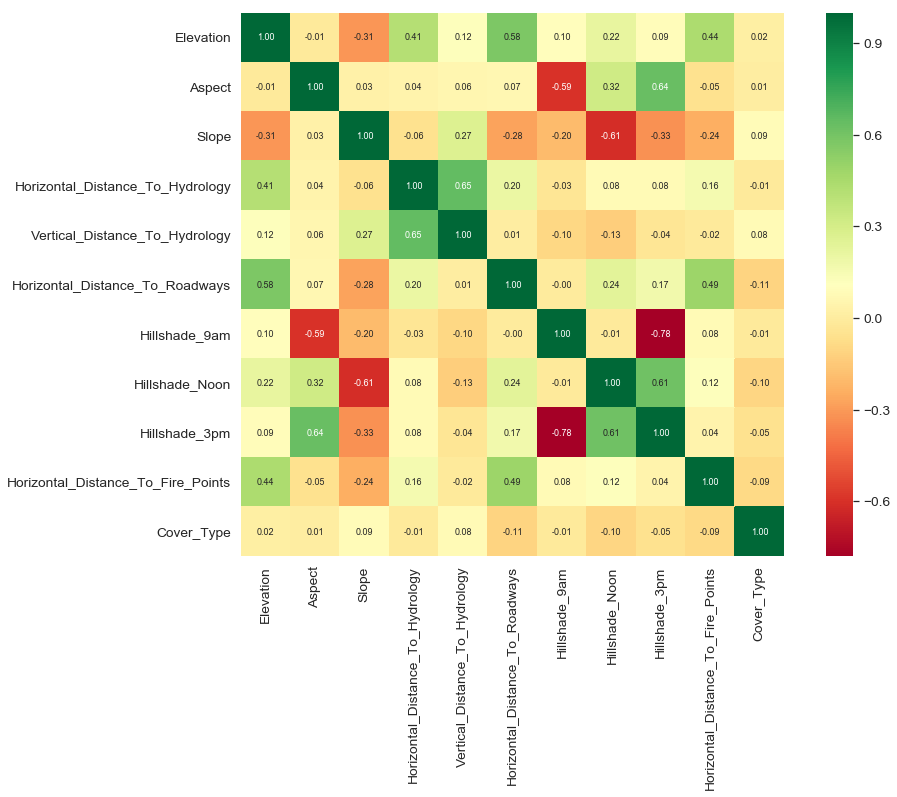

In [57]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(df_train[feat_num].corr(), square=True, cmap='RdYlGn',annot=True,annot_kws={'size': 9},fmt='.2f')

As one would expect, hillshades at three different times are moderately correlated with each other. 
Elevation is positively correlated with the three horizontal distances (hydrology, roadways, fire points), which makes intuitive sense.
Slope is negatively correlated with hillshade, specially at noon, thus implying more slope equals less sunlight.

# Model and prediction
We first establish a baseline using Random Forest, and then we will move on to more sophisticated ML models and feature selection strategies

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, make_scorer, f1_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Since the dataset is class-balanced, we can use macro averaging for the F1 scorer
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')


In [59]:
# Extract training data and labels
train_set = df_train.drop(columns = ['Cover_Type','Id'])
test_set = df_test.drop(columns = ['Id'])
train_labels = np.asarray(df_train['Cover_Type'])
[num_examples,num_feat] = train_set.shape
# Submission base which is used for making submissions to the competition
submission_base = df_test[['Id']].copy()

In [60]:
# Create pipeline for scaling
features = train_set.columns.tolist()
pipeline = Pipeline([('scaler', MinMaxScaler())])
# pipeline = Pipeline([('scaler', StandardScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.



In [61]:
# Routine to plot feature importances
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 10.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of x will show the most important features needed to reach 100*x% of cumulative importance
    
    """    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
        
    # Bar plot of n most important features
    trace0 = go.Bar(
                    y=df.loc[:n,'feature'],
                    x=df.loc[:n,'importance_normalized'],
                    marker=dict(
                        color='rgba(50, 171, 96, 0.6)',
                        line=dict(
                            color='rgba(50, 171, 96, 1.0)',
                            width=1),
                    ), orientation = 'h')
    layout = go.Layout(title='Normalized importance of features',
                      yaxis = dict(autorange = "reversed",
                                  tickangle = 0,
                                  automargin=True),
                      width=800)

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='norm-importance')
    
    
    if threshold:
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Cumulative importance plot        
        trace0 = go.Scatter(x=df.index,y=df['cumulative_importance'],line = dict(color = 'blue'))
        trace1 = go.Scatter(x=[importance_index + 1,importance_index + 1],y=[0,1.02],
                            line = dict(color = 'red',
                                       dash ='dash'))
        
        fig1 = go.Figure(data=[trace0,trace1])
        fig1['layout'].update(title='Cumulative Feature Importance',
                            xaxis = dict(title='Number of Features'),
                            yaxis = dict(title='Cumulative Importance'),
                             showlegend=False)
        plotly.offline.iplot(fig1, filename='basic-line')

        print(f'{importance_index + 1} features required for {100*threshold}% of cumulative importance.')
    
    return df

In [62]:
# Routine to train a model with cross-validation and append the results to a dataframe

model_results = pd.DataFrame(columns = ['model','cv_mean','cv_std'])

def run_cv_model(model, train_set, train_labels, name, model_results = None, folds = 10):
    
    """ Perform K-fold CV of the given model"""
    
    cv_scores = cross_val_score(model, train_set, train_labels, cv=folds, scoring=scorer)
    
    print(f'{folds}-Fold Cross Validation F1 Score = {round(cv_scores.mean(), 4)} with std = {round(cv_scores.std(), 4)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name,
                                                           'cv_mean':cv_scores.mean(),
                                                           'cv_std': cv_scores.std()}, index=[0]),
                                            ignore_index=True)
        return model_results
    
    

In [63]:
# Routine to plot scores of model_results

def plot_scores(model):
#     model.set_index('model', inplace=True)
    
    trace0 = go.Bar(
                    y=model['cv_mean'],
                    x=model['model'],
                    marker=dict(
                        color='orange',
                        line=dict(
                            color='black',
                            width=1),
                    ),
                    error_y=dict(
                            type='data',
                            array=model['cv_std'],
                            visible=True,
                            color ='black')
                    )
    
    layout = go.Layout(title='F1 scores of models',
                      width=800, xaxis = dict(tickfont=dict(size=14), automargin=True))

    fig = go.Figure(data=[trace0], layout=layout)
    plotly.offline.iplot(fig, filename='F1-scores')
    

In [66]:
model_results

model   cv_mean    cv_std
0    RF  0.777985  0.042856

### Random Forest initial classifier
Use 10-fold cross validation to get prediction results

In [65]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)
# 10 fold cross validation
model_results = run_cv_model(model_rf, train_set, train_labels, 'RF', model_results)


10-Fold Cross Validation F1 Score = 0.778 with std = 0.0429


Examine feature importances using the whole training set to fit

In [67]:
model_rf.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model_rf.feature_importances_})
feature_importances.head()


feature  importance
0                         Elevation    0.236056
1                            Aspect    0.050657
2                             Slope    0.036100
3  Horizontal_Distance_To_Hydrology    0.061912
4    Vertical_Distance_To_Hydrology    0.054358

In [68]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

24 features required for 95.0% of cumulative importance.


#### Use recursive feature elimination to improve RF

In [69]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [70]:
# Fit to training data
selector.fit(train_set, train_labels)

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

In [71]:
# Plot results
trace0 = go.Scatter(x=np.asarray(range(1,1+num_feat)),y=selector.grid_scores_,line = dict(color = 'blue'))
trace1 = go.Scatter(x=[selector.n_features_,selector.n_features_],
                    y=[np.min(selector.grid_scores_),np.max(selector.grid_scores_)],
                            line = dict(color = 'red',
                                       dash ='dash'))
fig1 = go.Figure(data=[trace0,trace1])
fig1['layout'].update(title=f'Recursive feature elimination -- score improves up to {selector.n_features_} features',
                              xaxis = dict(title='Number of Features'),
                              yaxis = dict(title='Macro F1 score'),
                              showlegend=False)
plotly.offline.iplot(fig1, filename='basic-line')

In [72]:
# Retrain the model 
model_results = run_cv_model(model_rf,selector.transform(train_set),train_labels,'RF-RFE', model_results)

10-Fold Cross Validation F1 Score = 0.7807 with std = 0.0421


### Compare multiple models

In [73]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


In [74]:
# Run linear SVM
model_results = run_cv_model(LinearSVC(), train_set, train_labels, 'LSVC', model_results)

10-Fold Cross Validation F1 Score = 0.6212 with std = 0.0669


In [75]:
# Run  Gaussian Naive Bayes
model_results = run_cv_model(GaussianNB(), train_set, train_labels, 'GNB', model_results)

10-Fold Cross Validation F1 Score = 0.3486 with std = 0.0632


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



In [76]:
# Run  Multi-layer perceptron
model_results = run_cv_model(MLPClassifier(hidden_layer_sizes = (32, 64, 128, 64, 32)),
                             train_set, train_labels, 'MLP-0', model_results)

model_results = run_cv_model(MLPClassifier(hidden_layer_sizes = (128, 256, 256, 128, 32)),
                             train_set, train_labels, 'MLP-1', model_results)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

10-Fold Cross Validation F1 Score = 0.7338 with std = 0.0434


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

10-Fold Cross Validation F1 Score = 0.7669 with std = 0.0483


In [77]:
# Run  LDA
model_results = run_cv_model(LinearDiscriminantAnalysis(), train_set, train_labels, 'LDA', model_results)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



10-Fold Cross Validation F1 Score = 0.6045 with std = 0.0684


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



In [78]:
# Run  Logistic Regression
model_results = run_cv_model(LogisticRegressionCV(), train_set, train_labels, 'LR', model_results)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: Conver

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: Conver

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: Conver

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/s

10-Fold Cross Validation F1 Score = 0.6243 with std = 0.0661


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



In [79]:
# Run  Ridge Regression
model_results = run_cv_model(RidgeClassifierCV(), train_set, train_labels, 'RR', model_results)

10-Fold Cross Validation F1 Score = 0.5772 with std = 0.0689


In [80]:
# Run  KNN
kn = [3, 5, 10, 20]
for n in kn:
    model_results = run_cv_model(KNeighborsClassifier(n_neighbors=n),
                                 train_set, train_labels, f'KNN-{n}', model_results)

10-Fold Cross Validation F1 Score = 0.7035 with std = 0.047
10-Fold Cross Validation F1 Score = 0.6941 with std = 0.0459
10-Fold Cross Validation F1 Score = 0.6716 with std = 0.0433
10-Fold Cross Validation F1 Score = 0.6468 with std = 0.0485


In [81]:
plot_scores(model_results)